# Machines à vecteurs de supports sur Julia

Dans ce notebook, nous allons voir comment implémenter l'algorithmes des machines à vecteurs de supports sur Julia. Nous commencerons par une brève présentation théorique des concepts clés des machines à vecteur de supports (SVM).

## Invention des machines à vecteurs de supports
L'invention des SVM est attribué à Vladimir Vapnik.
Les idées principales qui ont rendu possible les SVM sont:

* L'élaboration de l'hyperplan de séparation optimale en cas de séparabilité linéaires par Vapnik dans un papier intitulé ["Estimation of dependences based on empirical data"](https://2n6pw521j10.blob.core.windows.net/2n6pw521j10/MTQ0MTkyMTU4Mw==.pdf).
* La considération du produit scalaire dans l'espace Hilbert par Boser et al. en 1992 dans un article intitulé  "[A training algorithm for optimal margin](https://dl.acm.org/doi/pdf/10.1145/130385.130401)"
classifiers.)

* Construction de l'hyperplan optimale en cas de non séparabilité linéaire par l'utilisation des vastes marges (en acceptant des erreurs de classifications) par Cortes et vapnik dans un article intitulé ["Support-vector networks"](https://link.springer.com/content/pdf/10.1007/BF00994018.pdf)

## Vue synoptique des SVM

L'object des machines à vecteurs de supports, en classification, est de construire un hyperplan de séparateur optimale des differentes classes. Cepedant, les données soumis à l'apprentissage peuvent avoir plusieurs configurations avec des complexités de séparation différentes.


### Données linéairement séparable

* principe de séparabilité linéaire

L'ensemble des données d'apprentissage $$(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{n},y_{n}) \text{ y} \in \{-1,1\}$$  

est dit linéairement séparable s'il existe un vecteur $w$ et un réel $b$  telles les inégalités suivantes soient vérifiées pour tous les éléments de l'ensemble d'aprentissage

$$
\begin{cases}
      \text{$\langle{w,x_{i}}\rangle+b\ge 1$ si $y_{i}=1$}\\
      \text{$\langle{w,x_{i}}\rangle+b\le -1$ si $y_{i}=-1$}\\
    \end{cases}       
$$
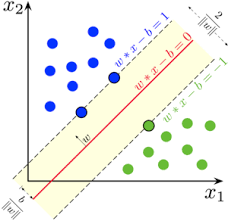

**Hyperplan de décision**

L'hyperplan optimal est de la forme $\langle{w_0,x_{i}}\rangle+b_0=0$. $w_0$ et $b_0$ sont des solution s au prblème d'optimisation qui consite à meximiser la marge au l'étendu entre les deux classes tous en s'assurant que chaque point se trouve derrière la frontière ($\langle{w,x_{i}}\rangle+b=1$ ou $\langle{w,x_{i}}\rangle+b=-1$) de sa classe d'appartenance.

**Problème primal**


$$\min_{w,b}  \frac{1}{2}w^{t}w \\ \quad \textrm{s.c.} \quad y_{i}(\langle{w,x_{i}}\rangle+b)\ge1$$

Le multiplicateur de Lagrange
$$L(w,b,\Lambda)= \frac{1}{2}w^{t}w-\sum_{i=1}^{n}\alpha_{i}( y_{i}(\langle{w,x_{i}}\rangle+b)-1)$$

**Problème dual**

$$\max_{w,b} \sum_{i=1}^{n}\alpha_{i}-\frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n}\alpha_{i} \alpha_{j}y_{i}y_{j} \langle{x_{i},x_{j}}\rangle \\ \quad \textrm{s.c.} \quad  \sum_{i=1}^{n}\alpha_{i} y_{i}=0\\ \quad  \alpha_{i}\ge 0$$

### Données linéairement separable apres une transformation des données d'origines dans une autres espace par produit scalaire dans l'espace d'Hilbert

![](https://www.researchgate.net/profile/Pierre-Bonazza-2/publication/334398446/figure/fig38/AS:779756819738628@1562919921661/Figure-A3-Noyau-applique-aux-SVM-dans-le-cas-de-donnees-non-lineairement-separables-1.ppm)

**Hyperplan de décision**

**Problème primal**

**Problème dual**

### Données linéairement séparable en acceptant des erreurs de classification
![](https://www.researchgate.net/publication/313760697/figure/fig1/AS:462232002797568@1487216105403/Soft-margin-SVM-showing-the-solid-maximal-margin-hyper-plane-and-dashed-functional.png)

**Hyperplan de décision**

**Problème primal**

$$\min_{w,b,\mathcal{E}} \frac{1}{2}w^{t}w+C\mathcal{F}(\sum_{i=1}^{n}\xi_{i}^{\lambda}) \\ \quad
\textrm{s.c.} \quad  y_{i}(\langle{w,x_{i}}\rangle+b)\ge1-\xi_i \\ \quad  \xi_i\ge0$$

avec  $$\mathcal{E}=(\xi_1,\xi_2...,\xi_n)$$ et $\mathcal{F}$ une fonction convexe et monotone et $\lambda$ suffisament petit

$\lambda$ sera fixé à 1. En effet, contrairement au cas où $\lambda<0$, avec $\lambda=1$ il existe une manière efficace de trouver une solution  au problème $(5)$


**Problème dual**



## Pratique des machines à vecteurs de supports sur le jeux de données iris

### les packages utilisés

In [17]:
#Les deux lignes suivantes permet d'installer un package(RDatasets en exemple)
#import Pkg
#Pkg.add("RDatasets")

using RDatasets #contient le jeu de données iris
using LIBSVM #pour implementer les SVM
using Printf #affichage
using Statistics #caluler la présision
using Plots #visualisation
using Gadfly #visualization
using LinearAlgebra #Calcul matricielle
using Lathe #pré-traitement

**Charger les données iris**

In [18]:
iris=dataset("datasets","iris");
head(iris)

6×5 DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ Cat…    │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa  │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa  │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa  │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa  │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa  │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa  │

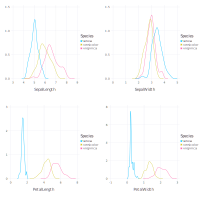

In [19]:
set_default_plot_size(20cm, 20cm)
d1=Gadfly.plot(iris,x=:SepalLength,color=:Species,Geom.density);
d2=Gadfly.plot(iris,x=:SepalWidth,color=:Species,Geom.density);
d3=Gadfly.plot(iris,x=:PetalLength,color=:Species,Geom.density);
d4=Gadfly.plot(iris,x=:PetalWidth,color=:Species,Geom.density);
gridstack([d1 d2 ; d3 d4])

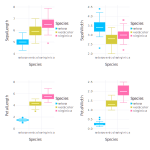

In [20]:
set_default_plot_size(15cm, 15cm)
b1=Gadfly.plot(iris,y=:SepalLength,x=:Species,color=:Species,Geom.boxplot);
b2=Gadfly.plot(iris,y=:SepalWidth,x=:Species,color=:Species,Geom.boxplot);
b3=Gadfly.plot(iris,y=:PetalLength,x=:Species,color=:Species,Geom.boxplot);
b4=Gadfly.plot(iris,y=:PetalWidth,x=:Species,color=:Species,Geom.boxplot);
gridstack([b1 b2 ; b3 b4])

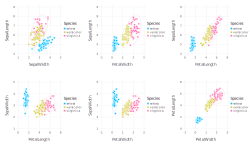

In [21]:
set_default_plot_size(25cm, 15cm)
p1=Gadfly.plot(iris,y=:SepalLength,x=:SepalWidth,group=:Species,color=:Species,Geom.point,Geom.ellipse);
p2=Gadfly.plot(iris,y=:SepalLength,x=:PetalWidth,group=:Species,color=:Species,Geom.point,Geom.ellipse);
p3=Gadfly.plot(iris,y=:SepalLength,x=:PetalLength,group=:Species,color=:Species,Geom.point,Geom.ellipse);
p4=Gadfly.plot(iris,y=:SepalWidth,x=:PetalLength,group=:Species,color=:Species,Geom.point,Geom.ellipse);
p5=Gadfly.plot(iris,y=:SepalWidth,x=:PetalWidth,group=:Species,color=:Species,Geom.point,Geom.ellipse);
p6=Gadfly.plot(iris,y=:PetalLength,x=:PetalWidth,group=:Species,color=:Species,Geom.point,Geom.ellipse);


gridstack([p1 p2 p3; p4 p5 p6])

In [22]:
using Random
using Lathe:preprocess
Random.seed!(1234)
train,test=preprocess._dfTrainTestSplit(iris,.70);
# LIBSVM handles multi-class data automatically using a one-against-one strategy
# Split the dataset into training set and testing set
Xtrain = Matrix(train[:,1:4])'
Xtest  =  Matrix(test[:,1:4])'
ytrain = train.Species
ytest  = test.Species;

### SVM avec un noyau radial

Dans cet exemple nous allons entrainer le modèle avec un algorithmes des machines à vecteurs de supports en utilisant un noyau radial de la forme:
$$K(x,x_{i})=e^{-\lambda ||x-x_{i}||}$$

l'hyperplan de séparation pour le cas binaire s'écrit
$$h(x)=\sum_{i=1}^{n}\alpha_{i}^{0}\alpha_{j}^{0}y_{i}y_{j}e^{-\lambda ||x-x_{i}||}$$

D'autant plus que$\lambda$ doit être choisi à l'avance, nous le faisons varier afin de pouvoir cerner le meilleur modèle. Nous allons quand meme commencer avec la valeur par defaut $$ \lambda_{default}=\frac{1}{\text{nombre le lignes dans le jeux de données}}$$

In [23]:
model = svmtrain(Xtrain, ytrain,kernel=Kernel.RadialBasis)
# Test model on the other half of the data.
ŷ, decision_values = svmpredict(model, Xtest);
# Compute accuracy
@printf "Accuracy: %.2f%%\n" mean(ŷ .== ytest) * 100

Accuracy: 97.14%


Avec la valeur par défaut de Lambda, la précision est de 97,73%.

**Faisons varier $\lambda$ de 0 à 1 avec un pas de 0.01.**

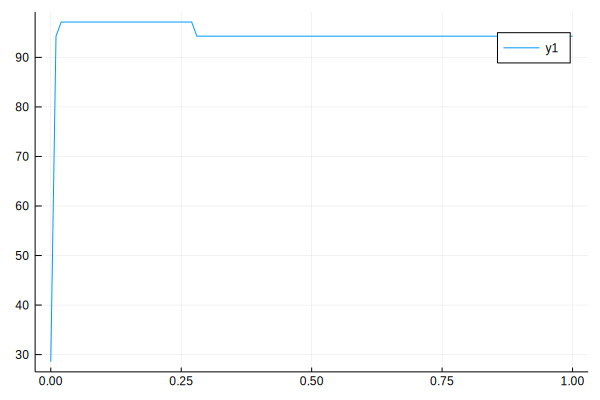

In [24]:
function modeliser(λ)
    model = svmtrain(Xtrain, ytrain, kernel=Kernel.RadialBasis,gamma=λ)
    ỹ, _ = svmpredict(model, Xtest)
    return mean(ỹ .== ytest) * 100
end

λ=0:0.01:1;
res=[modeliser(x) for x in λ];

Plots.plot(λ, res)

In [25]:
minimum(λ[res.==maximum(res)])

0.02

In [26]:
maximum(λ[res.==maximum(res)])

0.27

Pour $\lambda$ se situant entre 0,13 et 0.8, on obtient une présision de 100% sur les données test

### SVM avec un noyau polynomial

Dans cet exemple nous allons implémenter l'algorithme des machines à vecteurs de supports avec un noyau polinomiale $K(x,x_i)=(\langle{x,x_i}\rangle+1)^d$

l'hyperplan de séparation pour le cas binaire s'écrit
$$h(x)=\sum_{i=1}^{n}\alpha_{i}^{0}\alpha_{j}^{0}y_{i}y_{j}(\langle{x,x_i}\rangle+1)^d$$

la valeur pae défaur de $d$ est 3.

In [27]:
model = svmtrain(Xtrain, ytrain,kernel=Kernel.Polynomial)
# Test model on the other half of the data.
ŷ, decision_values = svmpredict(model, Xtest);
# Compute accuracy
@printf "Accuracy: %.2f%%\n" mean(ŷ .== ytest) * 100

Accuracy: 94.29%


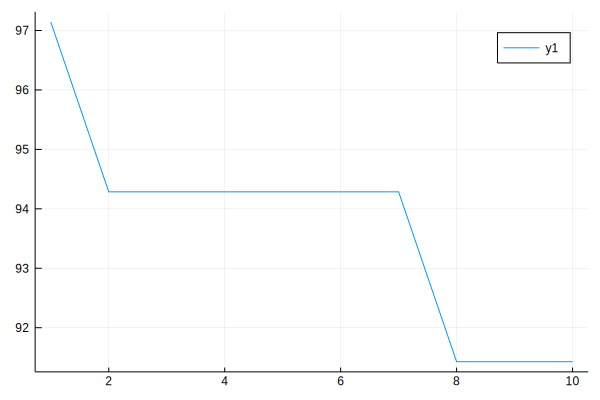

In [28]:
function modeliser(d)
    model = svmtrain(Xtrain, ytrain, kernel=Kernel.Polynomial,degree=d)
    ỹ, _ = svmpredict(model, Xtest)
    return mean(ỹ .== ytest) * 100
end

d=1:1:10;
res=[modeliser(x) for x in d];

Plots.plot(d, res)

Pour $d \in {1,2}$ la précision est de 100% sur les données test

### SVM avec un noyau linéaire
Dans cet exemple nous applons mettre en pratique l'algorithme des machines à vecteurs de supports avec un noyau linéaire

$$K(x,x_i)=\langle{x,x_i}\rangle$$

l'hyperplan de séparation pour le cas binaire s'écrit
$$h(x)=\sum_{i=1}^{n}\alpha_{i}^{0}\alpha_{j}^{0}y_{i}y_{j}\langle{x,x_i}\rangle$$

In [29]:
model = svmtrain(Xtrain, ytrain,kernel=Kernel.Linear)
# Test model on the other half of the data.
ŷ, decision_values = svmpredict(model, Xtest);
# Compute accuracy
@printf "Accuracy: %.2f%%\n" mean(ŷ .== ytest) * 100

Accuracy: 97.14%


### SVM avec un noyau pré-calculé

avec LIBSVM.ji il est possible d'implementer l'algorithme des machine à vecteur de supports avec un noyau pré-calculé.
Dans cet exemple,nous alons pré-calculé ne noyau
$$K(x,x_i)=\langle{x,x_i}\rangle^2$$


In [31]:
Kₜᵣₐᵢₙ = (Xtrain'* Xtrain).^2;
model = svmtrain(Kₜᵣₐᵢₙ, ytrain, kernel=Kernel.Precomputed)

Kₜₑₛₜ =( Xtrain' * Xtest).^2;
ỹ, _ = svmpredict(model, Kₜₑₛₜ)
@printf "Accuracy: %.2f%%\n" mean(ỹ .== ytest) * 100


Accuracy: 94.29%
